In [8]:
import json
import managerSQL
import matplotlib.pyplot as plt

In [2]:
# Config
with open('config.json') as json_file:
        params = json.load(json_file)

In [3]:
# Database connection
sql_manager = managerSQL.ManagerSQL(params['db'])

In [18]:
# Careful, considerable amount of RAM memomry needed when db is complete
data = sql_manager.select('reg_factors')

In [6]:
symbols = sql_manager.select_distinct_column_list('symbol', 'symbols')

In [8]:
symbols_fund = sql_manager.select_distinct_column_list('symbol', 'prices_fundamentals')

In [10]:
general_info = sql_manager.select('symbol_general_info')

In [12]:
general_info.head()

,symbol,company_name,countryba,sic,office,industry
0,AA,ALCOA CORP,US,3350.0,Manufacturing,ROLLING DRAWING & EXTRUDING OF NONFERROUS METALS
1,AAAU,PERTH MINT PHYSICAL GOLD ETF,None,NaN,None,None
2,AACG,ATA CREATIVITY GLOBAL - ADR,None,NaN,None,None
3,AADR,ADVISORSHARES DORSEY WRIGHT,None,NaN,None,None
4,AAL,AMERICAN AIRLINES GROUP INC,US,4512.0,Energy & Transportation,"AIR TRANSPORTATION, SCHEDULED"


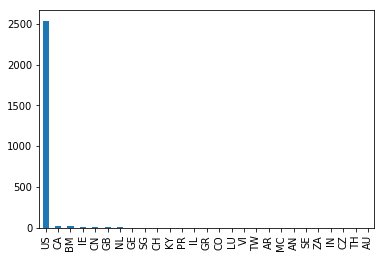

In [20]:
# It is essentially US companies
general_info[general_info.symbol.isin(symbols_fund)]['countryba'].value_counts().plot.bar()

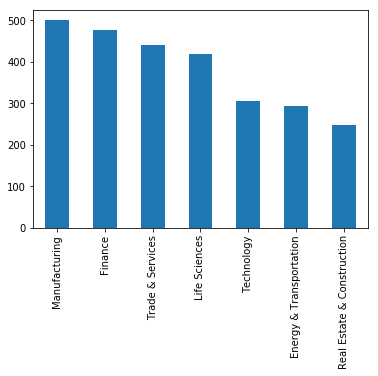

In [21]:
general_info[general_info.symbol.isin(symbols_fund)]['office'].value_counts().plot.bar()

In [27]:
query = "select * from reg_factors where symbol <= '" + str(symbols_fund[99]) + "'"
query

"select * from prices_fundamentals where symbol <= 'ALKS'"

In [28]:
data = sql_manager.select_query(query)

In [7]:
data.head()

,symbol,date,ret,equity,mcap,pb,mom
0,AA,2017-10-31,0.007563,5948000,21118760,3.550565,0.745629
1,AA,2017-11-01,-0.001676,5948000,21083400,3.544620,0.741249
2,AA,2017-11-02,-0.005044,5948000,20977320,3.526785,0.695430
3,AA,2017-11-03,-0.007190,5948000,20827040,3.501520,0.637253
4,AA,2017-11-06,0.003601,5948000,20902180,3.514153,0.633160


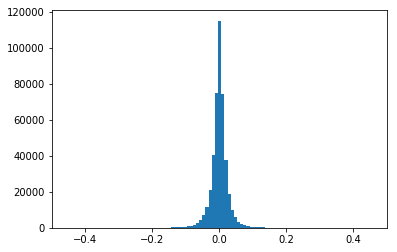

In [28]:
plt.hist(data.ret, bins=500)
plt.xlim(-0.5, 0.5)
plt.show()

Fat-tailed. Doesn't look really skewed.

In [29]:
data.ret.min(), data.ret.max()

(-2.3025851, 2.4079456)